# Observation / Action Specifiction (Rough Draft)

TODO:
- [ ] Observation Spec `replay_df`
   - Champs
   - Minions
   - Turrets
   - Monsters
   - Missiles

## Load DB Replays

In [4]:
import os
import pandas as pd
import numpy as np

db_replays_dir = "/Users/joe/Downloads/DB"
db_replays = os.listdir(db_replays_dir)

In [5]:
len(db_replays)

100

## Load Dataframe

In [6]:
import sqlite3
import pandas as pd
import os
db_replay = os.path.join(db_replays_dir, db_replays[0])
con = sqlite3.connect(db_replay)

### Champs `Dataframe`

#### Construct Champs Dataframe

In [7]:
champs_df = pd.read_sql("SELECT * FROM champs;", con)
champs_df

,game_id,time,name,hp,max_hp,mana,max_mana,armor,mr,ad,...,w_name,w_cd,e_name,e_cd,r_name,r_cd,d_name,d_cd,f_name,f_cd
0,2843393945,1.014682,Akali,570.00000,570.000,200.00000,200.0000,35.000,37.0000,67.4000,...,AkaliW,-1.014682,AkaliE,-1.014682,AkaliR,-1.014682,SummonerFlash,14.321388,SummonerTeleport,14.321388
1,2843393945,1.014682,Evelynn,642.00000,642.000,315.00000,315.0000,49.000,32.0000,61.0000,...,EvelynnW,-1.014682,EvelynnE,-1.014682,EvelynnR,-1.014682,SummonerFlash,14.321388,SummonerSmite,14.321388
2,2843393945,1.014682,Camille,646.00000,646.000,339.00000,339.0000,35.000,48.0000,73.4000,...,CamilleW,-1.014682,CamilleE,-1.014682,CamilleR,-1.014682,SummonerFlash,14.321388,SummonerTeleport,14.321388
3,2843393945,1.014682,Ezreal,600.00000,600.000,375.00000,375.0000,36.000,30.0000,67.4000,...,EzrealW,-1.014682,EzrealE,-1.014682,EzrealR,-1.014682,SummonerHeal,14.321388,SummonerFlash,14.321388
4,2843393945,1.014682,Rakan,610.00000,610.000,315.00000,315.0000,54.000,32.0000,62.0000,...,RakanW,-1.014682,RakanE,-1.014682,RakanR,-1.014682,SummonerDot,14.321388,SummonerFlash,14.321388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,2843393945,179.919720,Gnar,429.40005,699.880,37.50000,100.0000,46.664,30.9360,84.5600,...,GnarW,-178.919720,GnarE,-178.919720,GnarR,-178.919720,SummonerTeleport,321.221800,SummonerFlash,244.177440
6696,2843393945,179.919720,Viego,442.35980,630.000,10000.00000,10000.0000,34.000,48.0000,62.4000,...,ViegoW,-178.919720,ViegoE,-178.919720,ViegoR,-178.919720,SummonerSmite,13.755020,SummonerFlash,184.033580
6697,2843393945,179.919720,Ryze,199.65353,737.280,327.31903,731.9286,25.024,48.9360,60.1600,...,RyzeW,-178.919720,RyzeE,-3.846909,RyzeR,-178.919720,SummonerTeleport,-163.919720,SummonerFlash,-163.919720
6698,2843393945,179.919720,Xayah,887.82500,887.825,359.06335,399.0000,43.195,31.9175,80.5625,...,XayahW,-178.919720,XayahE,0.258713,XayahR,-178.919720,SummonerFlash,-163.919720,SummonerExhaust,-163.919720


In [8]:
champs_df = champs_df.drop_duplicates(subset=['time', 'name'])

In [10]:
champs_df = champs_df[champs_df["time"] > 15]

In [ ]:
champs_df = champs_df.drop("game_id", axis=1)

In [13]:
champs_df.loc[champs_df['q_cd'] < 0, 'q_cd'] = 0
champs_df.loc[champs_df['w_cd'] < 0, 'w_cd'] = 0
champs_df.loc[champs_df['e_cd'] < 0, 'e_cd'] = 0
champs_df.loc[champs_df['r_cd'] < 0, 'r_cd'] = 0
champs_df.loc[champs_df['d_cd'] < 0, 'd_cd'] = 0
champs_df.loc[champs_df['f_cd'] < 0, 'f_cd'] = 0

#### Player `Dataframe`

In [15]:
player_df = champs_df[champs_df["name"] == "Ezreal"]

#### Plot Cooldowns to Verify Data Quality

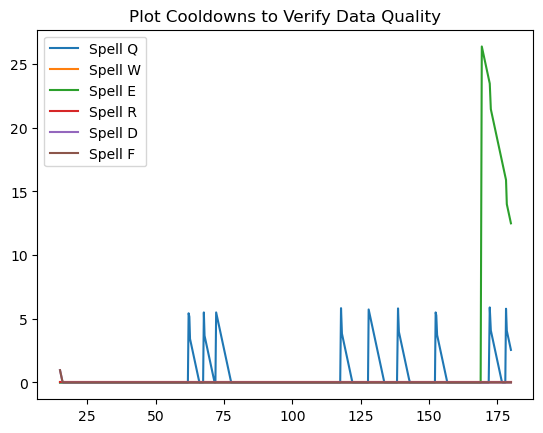

In [16]:
import matplotlib.pyplot as plt

# Assuming champs_df is your DataFrame and it is already defined
for spell in ["q", "w", "e", "r", "d", "f"]:
    cds = player_df[f"{spell}_cd"]
    tms = player_df["time"]
    plt.plot(tms, cds, label=f'Spell {spell.upper()}')

plt.title("Plot Cooldowns to Verify Data Quality")
plt.legend()  # This adds a legend to distinguish the lines.
plt.show()

## 1. Build Observation

### Add Game Time

In [35]:
replay_df = pd.DataFrame()

In [36]:
times = champs_df.drop_duplicates(subset=['time'])["time"]
replay_df["time"] = times

In [37]:
replay_df

,time
500,15.034752
510,15.303469
520,15.581064
530,15.849633
540,16.139160
...,...
6640,178.674740
6650,178.970980
6660,179.318790
6680,179.636140


### Add Distance Between Local Player and All Players

In [59]:
def add_distances(original_df, champ_name="Ezreal"):
    # Step 1: Filter out Player's data
    player_df = original_df[original_df['name'] == champ_name][['time', 'pos_x', 'pos_z']]

    # Step 2: Merge with the original DataFrame on 'time'
    merged_df = original_df.merge(player_df, on='time', suffixes=('', '_player'))

    # Step 3: Calculate Euclidean distance
    merged_df['distance_from_player_x'] = abs(
        merged_df["pos_x_player"] - merged_df["pos_x"])
    merged_df['distance_from_player_z'] = abs(
        merged_df["pos_z_player"] - merged_df["pos_z"])
    merged_df['distance_from_player'] = np.sqrt(
        (merged_df['pos_x'] - merged_df['pos_x_player'])**2 +
        (merged_df['pos_z'] - merged_df['pos_z_player'])**2)
    merged_df = merged_df.drop(columns=["pos_x_player", "pos_z_player"])

    # Filter out the rows where the champion is Ezreal, as we don't need the distance of Ezreal to himself
    return merged_df

final_df = add_distances(champs_df)

In [60]:
final_df

,time,name,hp,max_hp,mana,max_mana,armor,mr,ad,ap,...,e_cd,r_name,r_cd,d_name,d_cd,f_name,f_cd,distance_from_player_x,distance_from_player_z,distance_from_player
0,15.034752,Akali,570.00000,570.000,200.00000,200.0000,35.000,37.0000,67.4000,0.0,...,0.000000,AkaliR,0.0,SummonerFlash,0.965248,SummonerTeleport,0.965248,140.000,194.0000,239.240465
1,15.034752,Evelynn,642.00000,642.000,315.00000,315.0000,49.000,32.0000,61.0000,18.0,...,0.000000,EvelynnR,0.0,SummonerFlash,0.965248,SummonerSmite,0.965248,106.000,244.0000,266.030073
2,15.034752,Camille,746.00000,746.000,339.00000,339.0000,35.000,48.0000,83.4000,0.0,...,0.000000,CamilleR,0.0,SummonerFlash,0.965248,SummonerTeleport,0.965248,22.000,34.0000,40.496913
3,15.034752,Ezreal,700.00000,700.000,375.00000,375.0000,36.000,30.0000,77.4000,0.0,...,0.000000,EzrealR,0.0,SummonerHeal,0.965248,SummonerFlash,0.965248,0.000,0.0000,0.000000
4,15.034752,Rakan,660.00000,660.000,315.00000,315.0000,54.000,32.0000,62.0000,7.0,...,0.000000,RakanR,0.0,SummonerDot,0.965248,SummonerFlash,0.965248,472.000,146.0000,494.064773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5735,179.919720,Gnar,429.40005,699.880,37.50000,100.0000,46.664,30.9360,84.5600,0.0,...,0.000000,GnarR,0.0,SummonerTeleport,321.221800,SummonerFlash,244.177440,7283.955,12402.9683,14383.658196
5736,179.919720,Viego,442.35980,630.000,10000.00000,10000.0000,34.000,48.0000,62.4000,0.0,...,0.000000,ViegoR,0.0,SummonerSmite,13.755020,SummonerFlash,184.033580,1243.068,5825.7573,5956.900719
5737,179.919720,Ryze,199.65353,737.280,327.31903,731.9286,25.024,48.9360,60.1600,9.0,...,0.000000,RyzeR,0.0,SummonerTeleport,0.000000,SummonerFlash,0.000000,2194.932,7219.7573,7546.033525
5738,179.919720,Xayah,887.82500,887.825,359.06335,399.0000,43.195,31.9175,80.5625,0.0,...,0.258713,XayahR,0.0,SummonerFlash,0.000000,SummonerExhaust,0.000000,682.258,404.5527,793.182744


### Flatten Champs

In [68]:
# NOTE: This needs to be adjusted for variable length game object types
#       Champs and turrets are the only ones which are fine by default as they have fixed number of objects (10 and I think 24 by default)
#       However, mininons, monsters?, missiles are variable. So need to define a maximum and pad up to this for each
#       Using the numpy reshape method is very efficient, but only works for the static length game object lists, better to
#       switch to using a more flexible list based method which will compose the lists a bit more flexibly and allows for 0 padding to max
#       list len.

def stack_observation(df, max_items):
    """Takes a game object list df and stacks it for deep learning model input."""
    times = df["time"].unique() # this is unique timestamps which were recorded by T_T-Pandoras-Box
    obs = []
    for tm in times:
        cur = df[df["time"] == tm]
        if cur.shape < max_items:
            pass
        
        # flatten
        pass

        # append
        obs.append(cur)

    # new_cols = [f"{c}_{idx}"
    #             for idx in range(len(names))
    #             for c in final_df.columns[1:]]
    # new_cols = ["time"] + new_cols

    # # Reshape the array
    # vals = final_df.values[:, 1:]
    # flat_champs_df_values = vals.reshape((
    #     int((vals.shape[0]) / 10),
    #     len(names),
    #     (vals.shape[1])
    # )).reshape((int(vals.shape[0] / 10), -1))

    # times_arr = np.array(times).reshape(-1, 1)
    # flat_champs_df_values = np.hstack((times_arr, flat_champs_df_values))
    # flat_champs_df_values

# times, names
stacked_champs_df = stack_observation(champs_df)

(array([ 15.034752,  15.303469,  15.581064,  15.849633,  16.13916 ,
         16.408983,  16.676006,  16.943062,  17.223831,  17.501688,
         17.702156,  17.976183,  18.258318,  18.533386,  18.802769,
         19.069786,  19.340784,  19.607807,  19.87483 ,  20.141844,
         20.408873,  20.684717,  20.970007,  21.184626,  21.478914,
         21.76193 ,  21.975275,  22.242296,  22.576124,  22.776417,
         23.044378,  23.32331 ,  23.592764,  23.859781,  24.131208,
         24.417189,  24.684206,  24.91443 ,  25.209192,  25.477703,
         25.744713,  26.020931,  26.307364,  26.577106,  26.845377,
         27.113466,  27.380486,  27.581999,  27.856588,  28.123592,
         28.390598,  28.657635,  28.924744,  29.19188 ,  29.458885,
         29.760168,  29.994621,  30.271435,  30.538446,  30.787556,
         31.065836,  31.350662,  31.588158,  31.852415,  32.142292,
         32.37405 ,  32.676907,  32.93536 ,  33.220783,  33.505104,
         33.723076,  34.013115,  34.300354,  34.

In [67]:
flat_champs_df = pd.DataFrame(
    data=flat_champs_df_values,
    columns=new_cols)
flat_champs_df

,time,name_0,hp_0,max_hp_0,mana_0,max_mana_0,armor_0,mr_0,ad_0,ap_0,...,e_cd_9,r_name_9,r_cd_9,d_name_9,d_cd_9,f_name_9,f_cd_9,distance_from_player_x_9,distance_from_player_z_9,distance_from_player_9
0,15.034752,Akali,570.0,570.0,200.0,200.0,35.0,37.0,67.4,0.0,...,0.0,ThreshRPenta,0.0,SummonerFlash,0.965248,SummonerDot,0.965248,13450.0,13496.0,19053.727089
1,15.303469,Akali,570.0,570.0,200.0,200.0,35.0,37.0,67.4,0.0,...,0.0,ThreshRPenta,0.0,SummonerFlash,0.696531,SummonerDot,0.696531,13430.9388,13357.00426,18942.008337
2,15.581064,Akali,570.0,570.0,200.0,200.0,35.0,37.0,67.4,0.0,...,0.0,ThreshRPenta,0.0,SummonerFlash,0.418936,SummonerDot,0.418936,13423.0773,13168.13897,18803.693471
3,15.849633,Akali,570.0,570.0,200.0,200.0,35.0,37.0,67.4,0.0,...,0.0,ThreshRPenta,0.0,SummonerFlash,0.150367,SummonerDot,0.150367,13383.80603,12948.6872,18622.426374
4,16.13916,Akali,570.0,570.0,200.0,200.0,35.0,37.0,67.4,0.0,...,0.0,ThreshRPenta,0.0,SummonerFlash,0.0,SummonerDot,0.0,13238.09216,12675.4329,18327.948146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,178.67474,Akali,574.6728,771.68,78.277725,300.0,38.384003,38.476,69.776,0.0,...,0.0,ThreshRPenta,0.0,SummonerFlash,0.0,SummonerDot,0.0,705.101,353.6278,788.809255
570,178.97098,Akali,576.5816,771.68,84.027725,300.0,38.384003,38.476,69.776,0.0,...,0.0,ThreshRPenta,0.0,SummonerFlash,0.0,SummonerDot,0.0,705.101,353.6278,788.809255
571,179.31879,Akali,576.5816,771.68,84.027725,300.0,38.384003,38.476,69.776,0.0,...,0.0,ThreshRPenta,0.0,SummonerFlash,0.0,SummonerDot,0.0,727.58,484.7362,874.266458
572,179.63614,Akali,577.9464,771.68,89.777725,300.0,38.384003,38.476,69.776,0.0,...,0.0,ThreshRPenta,0.0,SummonerFlash,0.0,SummonerDot,0.0,730.776,479.9364,874.283999


## 2. Infer Action

### Get Basic Attacks

In [34]:
ezreal_basics_df = \
    pd.read_sql("SELECT * FROM \"missiles\" WHERE \"spell_name\" LIKE '%ezrealbasic%';", con)
ezreal_basics_df

,game_id,time,name,missile_name,spell_name,src_idx,dst_idx,start_pos_x,start_pos_z,end_pos_x,end_pos_z,pos_x,pos_z
0,2843393945,154.97510,EzrealBasicAttack,EzrealBasicAttack2,EzrealBasicAttack,104924715,208666766,11277.585,1008.08510,11548.402,1578.0912,11469.564,1386.43070
1,2843393945,155.18436,EzrealBasicAttack,EzrealBasicAttack2,EzrealBasicAttack,104924715,208666766,11277.585,1008.08510,11548.402,1578.0912,11441.575,1635.42650
2,2843393945,163.53180,EzrealBasicAttack2,EzrealBasicAttack3,EzrealBasicAttack2,104924715,437585465,10797.181,1167.78310,11307.990,1596.6964,11279.419,1579.18460
3,2843393945,163.89961,,EzrealBasicAttack3,EzrealBasicAttack2,104924715,1868654659,10797.181,1167.78310,11307.990,1596.6964,11279.419,1579.18460
4,2843393945,168.50170,EzrealBasicAttack,EzrealBasicAttack2,EzrealBasicAttack,104924715,447088229,10407.538,1335.84280,11085.911,1589.0940,10886.692,1525.05470
5,2843393945,170.77783,EzrealBasicAttack2,EzrealBasicAttack3,EzrealBasicAttack2,104924715,464782971,10098.872,924.48926,10857.082,1177.6383,10884.745,1181.19370
6,2843393945,171.14084,EzrealBasicAttack2,EzrealBasicAttack3,EzrealBasicAttack2,104924715,464782971,10098.872,924.48926,10857.082,1177.6383,10884.745,1181.19370
7,2843393945,172.57281,EzrealBasicAttack,EzrealBasicAttack2,EzrealBasicAttack,104924715,454887144,10034.534,1048.13060,10626.000,1222.0000,10086.187,1131.77720
8,2843393945,173.09064,,EzrealBasicAttack2,EzrealBasicAttack,104924715,-1752021792,10034.534,1048.13060,10626.000,1222.0000,10086.187,1131.77720
9,2843393945,174.16150,EzrealBasicAttack2,EzrealBasicAttack3,EzrealBasicAttack2,104924715,464782971,10229.184,1031.48750,10857.082,1177.6383,10273.695,1119.92180
